In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 47kB/s 
     |████████████████████████████████| 3.2MB 32.9MB/s 
     |████████████████████████████████| 491kB 53.1MB/s 
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [ ]:
!pip install numpy
!pip install keras

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')


import os, random, shutil
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16


##
base_dir = 'gdrive/My Drive/backup/data/'
train_dir = 'gdrive/My Drive/backup/data/train'
test_dir = os.path.join(base_dir, 'test')

train_size, validation_size, test_size = 4035, 0, 450

img_width, img_height = 224, 224  # Default input size for VGG16

##
conv_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(img_width, img_height, 3))
conv_base.summary()

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 128



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
58892288/58889256 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_______________________________________________________________

In [ ]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))  # Must be equal to the output of the convolutional base
    labels = np.zeros(shape=(sample_count , 9))
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            batch_size=batch_size,
                                            shuffle=True,
                                            target_size=(img_height, img_width),
                                            classes = list(np.array(["bag","backpack","iphone","huawei","samsung","wallet","pen","watch","other"])))
    # Pass data through convolutional base
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
train_features, train_labels = extract_features(train_dir, train_size)
test_features, test_labels = extract_features(test_dir, test_size)


Found 4035 images belonging to 9 classes.
Found 450 images belonging to 9 classes.


In [ ]:
from keras import models
from keras import layers
from keras import optimizers

epochs = 40

model = models.Sequential()
model.add(layers.Flatten(input_shape=(7,7,512)))
model.add(layers.Dense(256, activation='relu', input_dim=(7*7*512)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(9, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 2313      
Total params: 6,425,097
Trainable params: 6,425,097
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size)

Epoch 1/40
4035/4035 [==============================] - 5s 1ms/step - loss: 1.6623 - acc: 0.3266
Epoch 2/40
4035/4035 [==============================] - 4s 1ms/step - loss: 0.9125 - acc: 0.6974
Epoch 3/40
4035/4035 [==============================] - 4s 1ms/step - loss: 0.4886 - acc: 0.8325
Epoch 4/40
4035/4035 [==============================] - 4s 1ms/step - loss: 0.3134 - acc: 0.8919
Epoch 5/40
4035/4035 [==============================] - 4s 1ms/step - loss: 0.2382 - acc: 0.9222
Epoch 6/40
4035/4035 [==============================] - 4s 1ms/step - loss: 0.1806 - acc: 0.9363
Epoch 7/40
4035/4035 [==============================] - 4s 1ms/step - loss: 0.1530 - acc: 0.9467
Epoch 8/40
4035/4035 [==============================] - 4s 1ms/step - loss: 0.1229 - acc: 0.9606
Epoch 9/40
4035/4035 [==============================] - 4s 1ms/step - loss: 0.0979 - acc: 0.9678
Epoch 10/40
4035/4035 [==============================] - 4s 1ms/step - loss: 0.0805 - acc: 0.9720
Epoch 11/40
4035/4035 [======

In [ ]:
model.save('model5.h5')

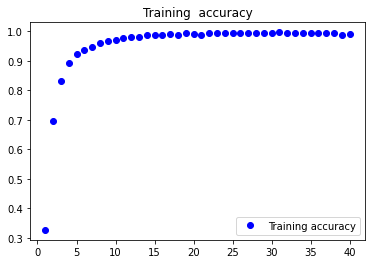

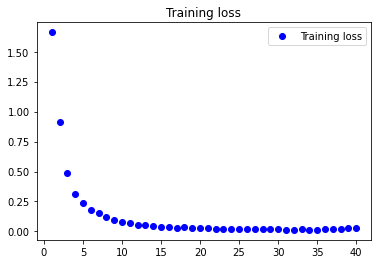

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.title('Training  accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

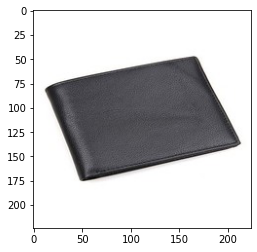

[[1.11947407e-09 3.30622707e-09 3.32502692e-10 4.00032507e-11
  1.14261184e-10 8.10658455e-01 7.27141058e-14 4.66047340e-13
  1.93144089e-07]]


In [ ]:
def visualize_predictions(classifier):
        path = 'gdrive/My Drive/backup/data/test/wallet'

        # Get picture
        random_img = random.choice(os.listdir(path))
        img_path = os.path.join(path, random_img)
        img = image.load_img(img_path, target_size=(img_width, img_height))
        img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
        img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application

        # Extract features
        features = conv_base.predict(img_tensor.reshape(1,img_width, img_height, 3))

        # Make prediction
        try:
            prediction = classifier.predict(features)
        except:
            prediction = classifier.predict(features.reshape(1, 7*7*512))

        # Show picture
        plt.imshow(img_tensor)
        plt.show()
        print(prediction)
        
visualize_predictions(model)